# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#import all the libraries here
import numpy as np
import matplotlib.pyplot as plt
from  numpy import random
np.random.seed(100)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import math
import pickle

# Load *Dataset*
Load data from the given pickle file

In [26]:
data_file='/content/drive/MyDrive/MNIST_data.pkl'
# load the data set
with open(data_file,'rb') as infile:
  train_dataset=pickle.load(infile)
  # normalize
# Split into X_train, y_train, X_test, y_test
X=train_dataset['X']
y=train_dataset['y']
# you can use stratified splitting from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=1000,shuffle=True)


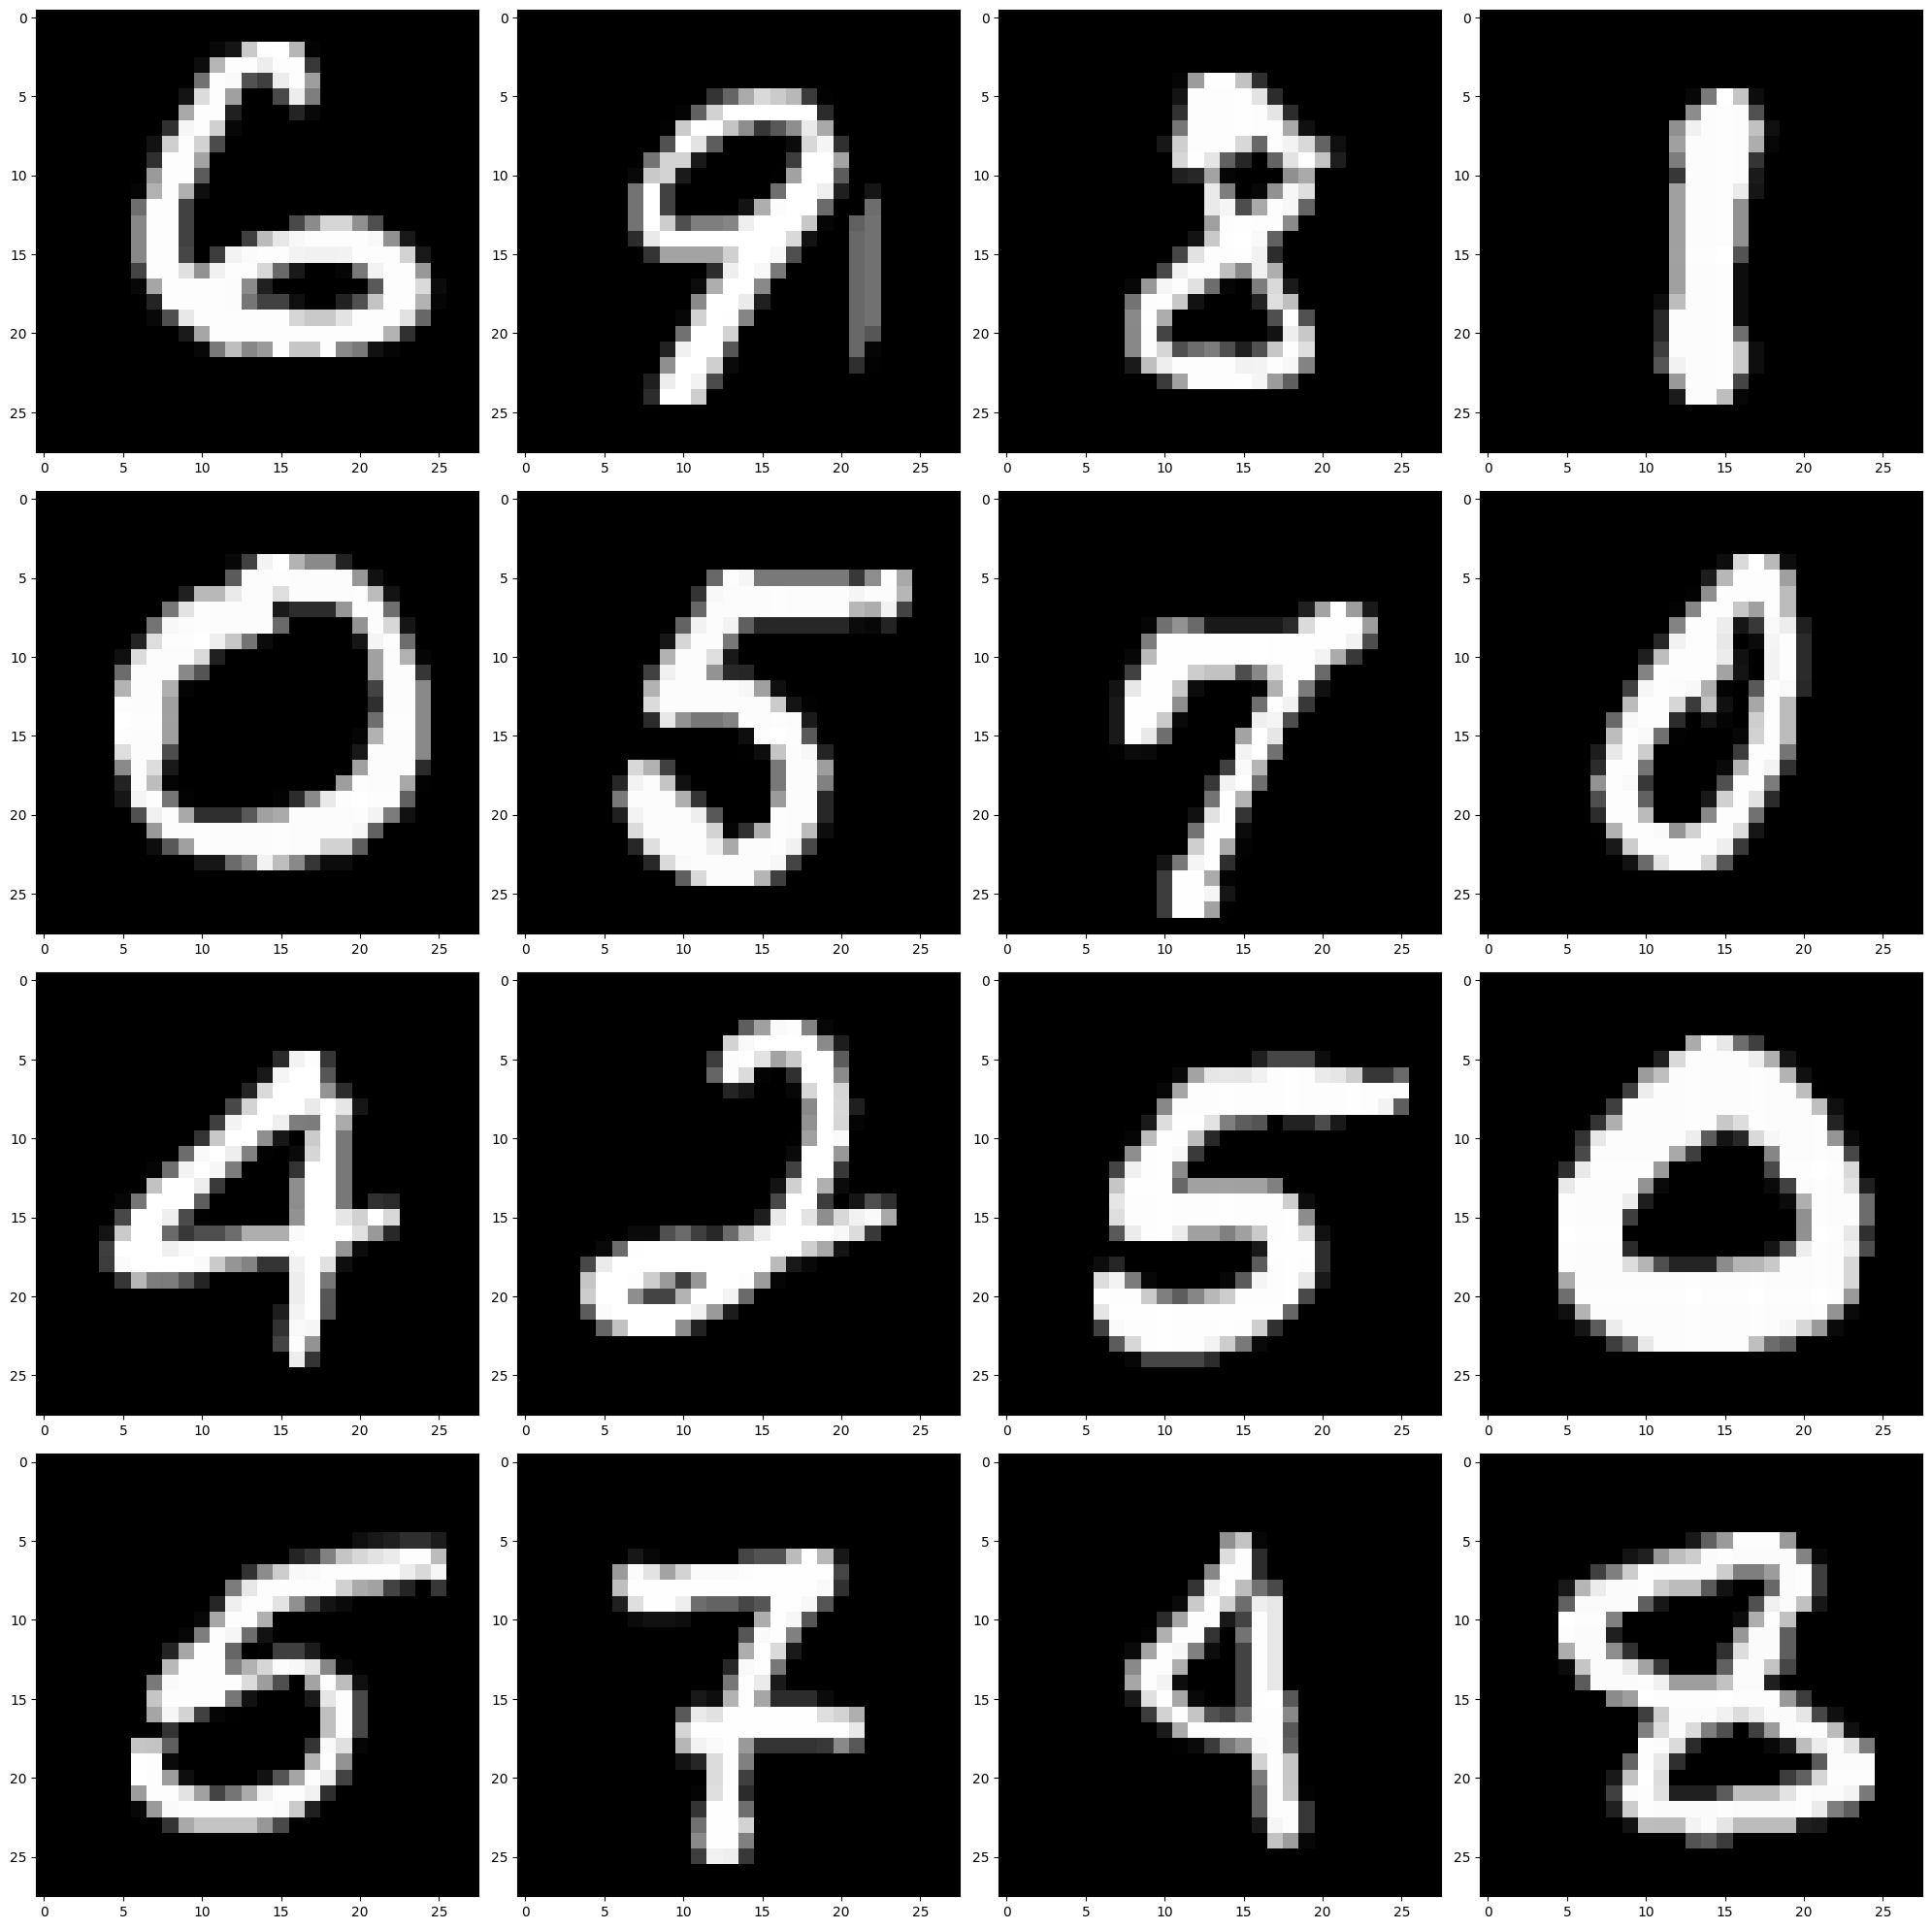

In [27]:
# display a 4x4 grid,
# choose 16 images randomly, display the images as well as corresponding label
display_size = 4
fig, ax = plt.subplots(display_size,display_size,figsize=(20,20))
for i in range(display_size):
    for j in range(display_size):
        ax[i,j].imshow(X[i*display_size+j].reshape(28,28),cmap='gray')
        ax[i,j].axis('on')
plt.tight_layout()
plt.show()


## Building up parts of our classifier

**Activation functions**

In [28]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return np.maximum(0,z)
    pass

def softmax(x):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)

    """
    exp_x = np.exp(x - np.max(x, axis=1,keepdims=True))
    return exp_x / np.sum(exp_x,axis=1,keepdims=True)

    pass

**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

**Notes about the Neural Network**
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



In [29]:
def init_params(input_nodes,hidden_nodes,output_nodes):
    """
    ideally it should take the size of all the layers and
    should return the initialized weights.
    """
    w1= np.random.randn(hidden_nodes,input_nodes)*0.01
    w2= np.random.randn(output_nodes,hidden_nodes)*0.01
    bias1= np.zeros((hidden_nodes,1))
    bias2= np.zeros((output_nodes,1))
    return w1,bias1,w2,bias2

    pass

**Forward Propagation**

In [30]:
def forward_propg(X, w1,w2,bias1,bias2,input_nodes,hidden_nodes,output_nodes):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    w1= np.random.randn(hidden_nodes,input_nodes)*0.01
    w2= np.random.randn(output_nodes,hidden_nodes)*0.01
    bias1= np.zeros((hidden_nodes,1))
    bias2= np.zeros((output_nodes,1))
    z1=np.dot(X,w1.T)+bias1.T
    z2=np.dot(a1,w2.T)+bias2.T
    a1=relu(z1)
    a2=softmax(z2)

    return z1,z2,a1,a2
    pass
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
    pass

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [31]:
def backward_propg(X, y,w1,w2,bias1,bias2,a1,a2):
    """
    should update the weights and return updated weights

    """
    m = len(y)
    dz2 = a2 - y
    dw2 = 1/m * np.dot(a1.T,dz2)
    dbias2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(dz2,w2) * relu_derivative(a1)
    dw1 = 1/m * np.dot(X.T,dz1)
    dbias1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    return dw2, dbias2, dw1, dbias1

    pass

In [32]:
def cost_func(z2,a2,y):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    loss=0
    m=np.size(y,0)
    for i in range(m):
        loss=loss-np.log(a2[i, y[i]])
    loss=loss/m

    return loss

    pass


## Integrate everything

In [33]:
def train(X, y, hidden_nodes, epochs,lr,input_nodes,output_nodes):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    w1,bias1,w2,bias2=init_params(input_nodes,hidden_nodes,output_nodes)

    for i in range(epochs):
        # forward propagation

        #print cost at every 100 or so iterations
        # backward propagation
        z1,z2,a1,a2=forward_propg(X,w1,w2,bias1,bias2,input_nodes,hidden_nodes,output_nodes)
        loss=cost_func(z2,a2,y)
        dw2, dbias2, dw1, dbias1 = backward_propg(X,y,w1,w2,bias1,bias2,a1,a2)
        w2-= lr * dw2.T
        bias2 -= lr * np.sum(dbias2.T, axis=1, keepdims=True)
        w1 -= lr * dw1.T
        bias1 -= lr * np.sum(dbias1.T, axis=1, keepdims=True)
        if i % 100 == 0:
           print(f"Epoch {i}, Loss: {loss}")
        return w1,w2,bias1,bias2
        pass

In [34]:
def predict(X, w1,w2, bias1, bias2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1=np.dot(X,w1.T)+bias1.T
    a1=relu(z1)
    z2=np.dot(a1,w2.T)+bias2.T
    layer_1_output =z2
    prediction= np.argmax(layer_1_output,axis=1)
    return prediction
    pass

In [35]:
def accuracy(pred, y):
    """
    prints % accuracy
    """
    pred = np.array(pred)
    y = np.array(y)
    accuracy=np.mean(pred==y)*100
    print(accuracy)
    pass

### Save as pickle

In [36]:
import pickle
import random

roll_num = "23B1861" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': np.random.randn(784,hidden_dim), # layer 0 weight (784, z)
    'layer_0_bias': np.zeros((hidden_dim,1)), # layer 0 bias (z, 1)
    'layer_1_wt': np.random.randn(hidden_dim,10), # layer 1 weight (z, 10)
    'layer_1_bias': np.zeros((10,1)) # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

### Visualizing the results

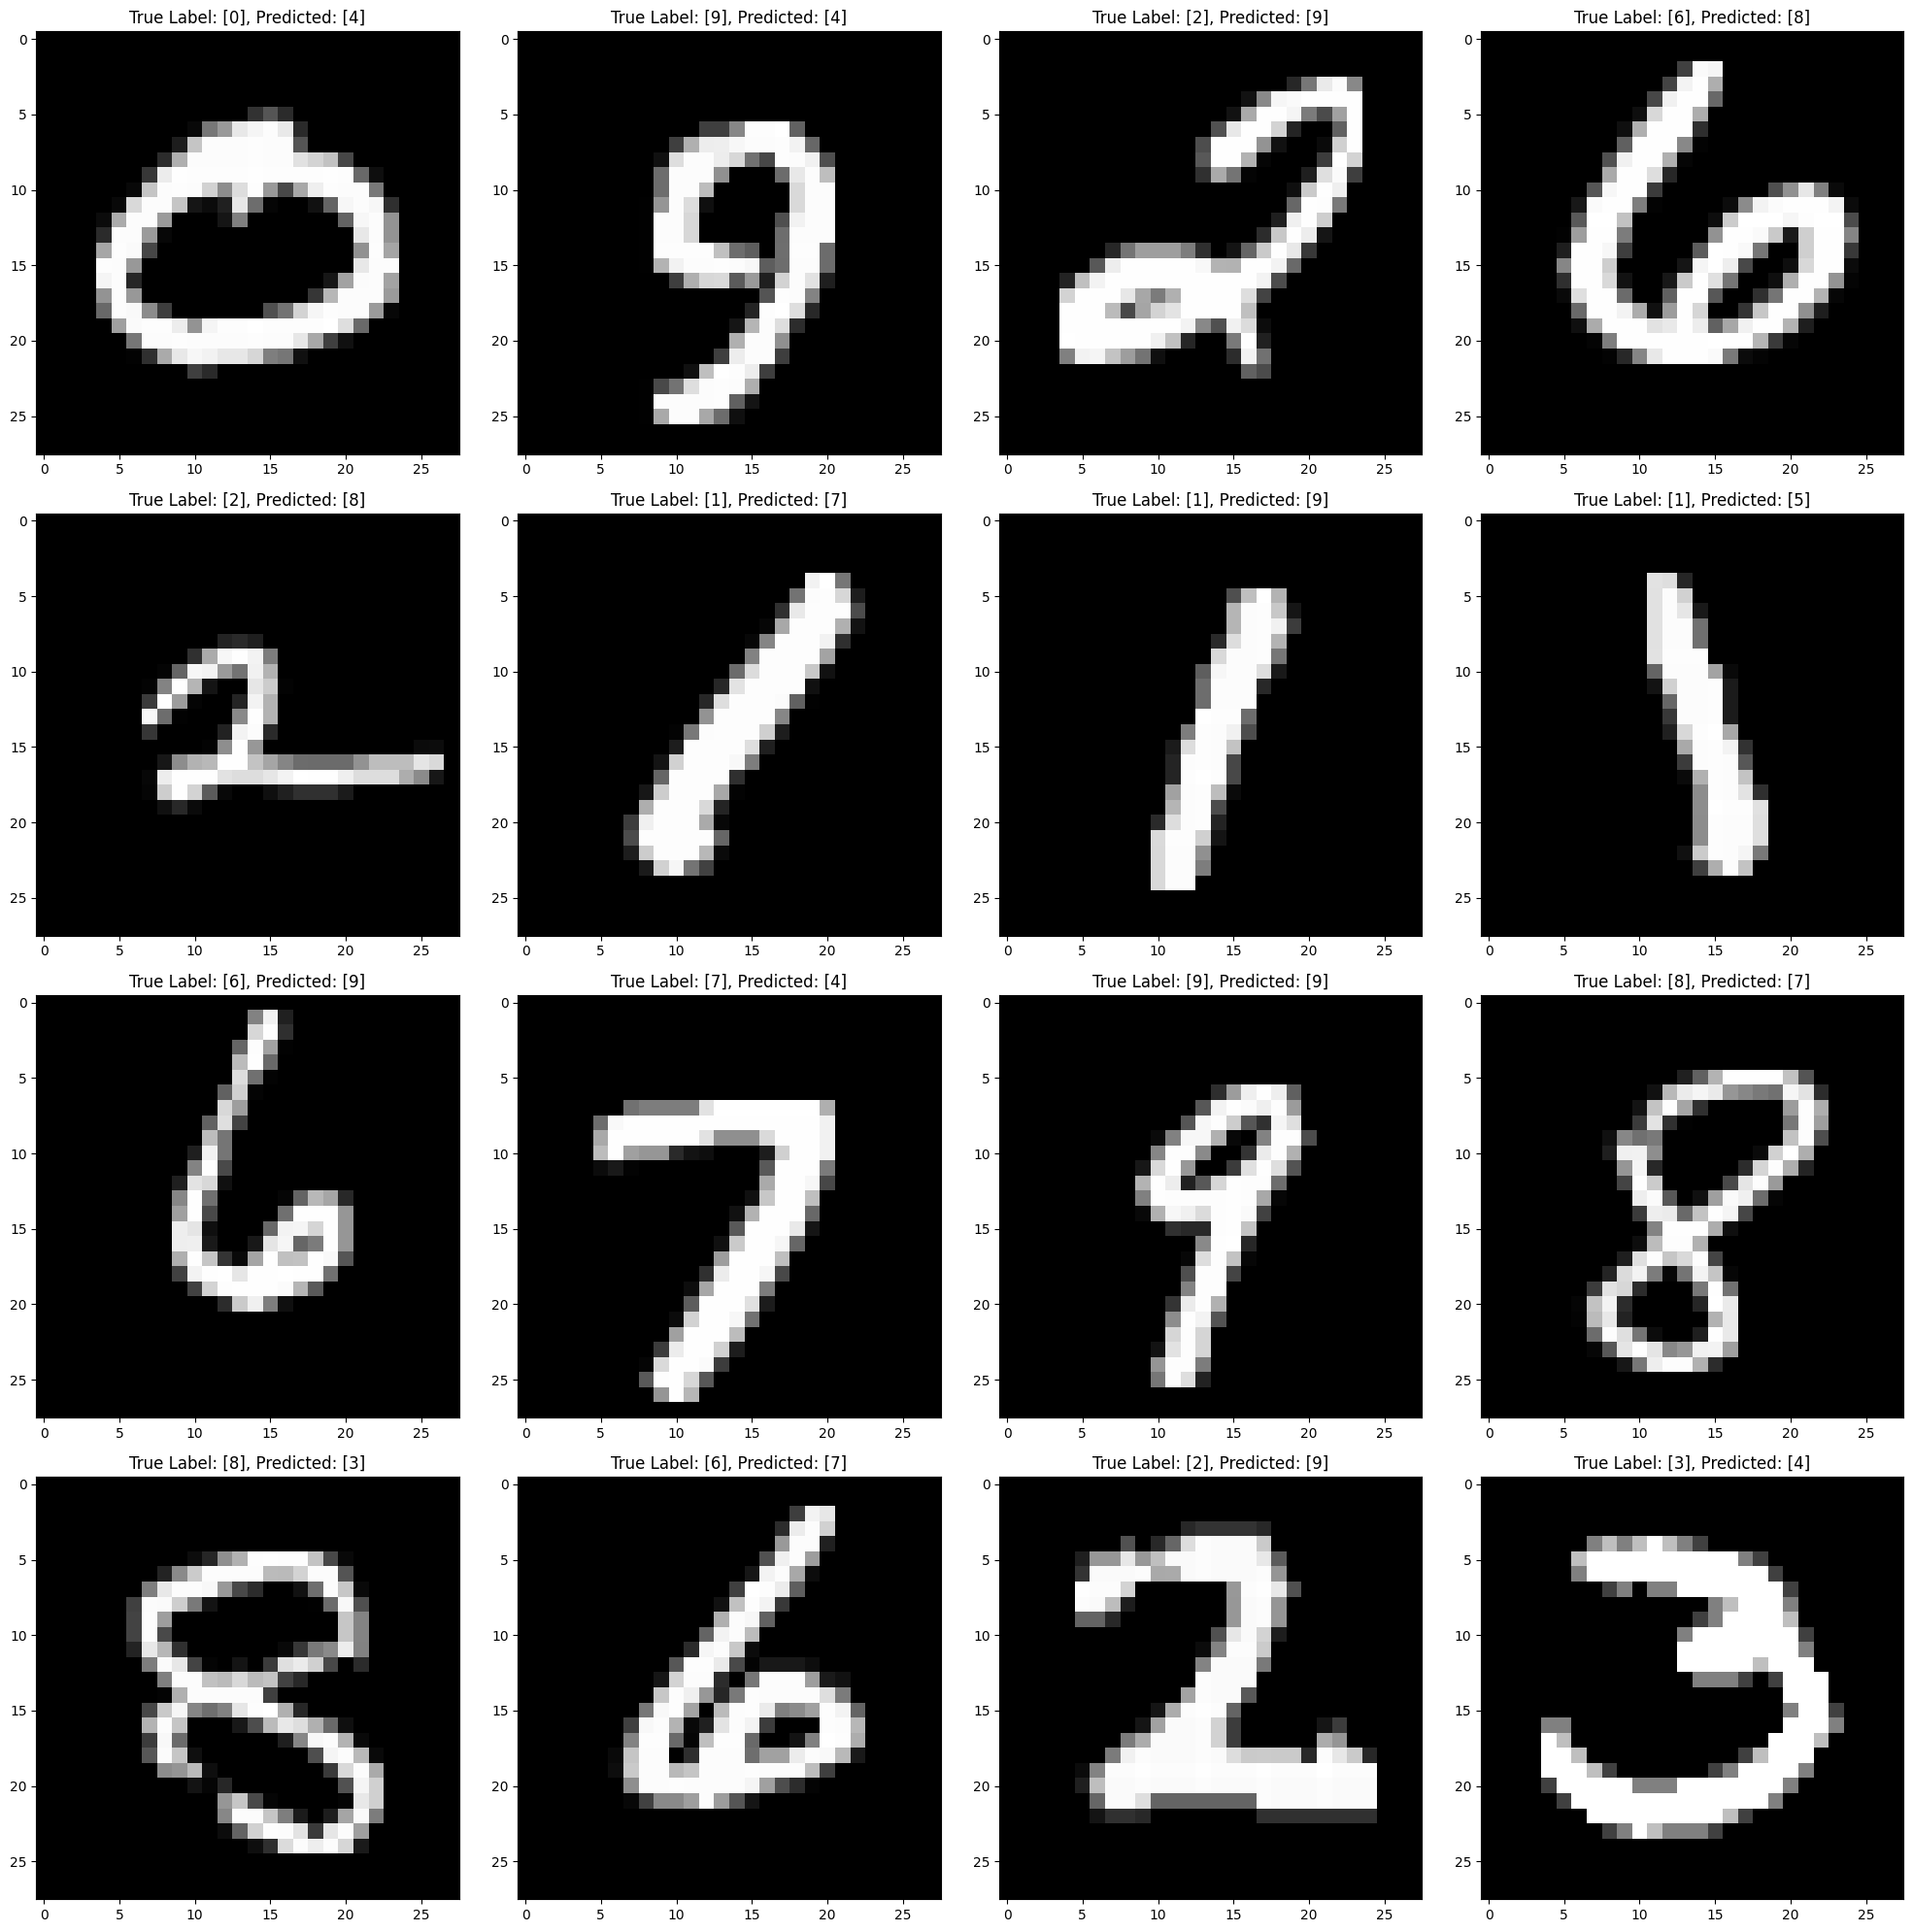

In [37]:
# Load the trained model(check out the saved files model will be model_ldap.pkl)
data_file='/content/model_23B1861.pkl'
with open(data_file,'rb') as infile:
  train_dataset=pickle.load(infile)
# Extract model parameters
hidden_dim=train_dataset['z']
layer_0_wt=train_dataset['layer_0_wt']
layer_0_bias=train_dataset['layer_0_bias']
layer_1_wt=train_dataset['layer_1_wt']
layer_1_bias=train_dataset['layer_1_bias']

# write a function 'predict' that takes inputs and returns predictions
def predict(X,layer_0_wt, layer_1_wt,layer_0_bias, layer_1_bias):
    # Forward pass
    layer_0_output = np.dot(X, layer_0_wt) + layer_0_bias.T
    layer_0_activation = np.maximum(0, layer_0_output)
    layer_1_output = np.dot(layer_0_activation, layer_1_wt) + layer_1_bias.T
    prediction= np.argmax(layer_1_output,axis=1)
    return prediction

    pass

# Visualize predictions on a random subset of test data
np.random.seed(1000)
fig,ax=plt.subplots(4,4,figsize=(20,20))
random_indices = np.random.choice(len(X), size=16, replace=False)
for k,index in enumerate(random_indices):
  prediction = predict(X[index], layer_0_wt,  layer_1_wt,layer_0_bias, layer_1_bias)
  i,j=divmod(k,display_size)
  ax[i,j].imshow(X[index].reshape((28,28)),cmap='gray')
  ax[i,j].set_title(f'True Label: {y[index]}, Predicted: {(prediction)}')
  ax[i,j].axis('on')
# Display the images with true and predicted labels
plt.tight_layout()
plt.show()